# International Air Passenger Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## Import data and basic analysis

In [2]:
air_passengers = pd.read_csv("data/AirPassengers.csv", header = 0, parse_dates = [0], infer_datetime_format=True,
                             names = ['Month', 'Passengers'], index_col = 0)


In [3]:
air_passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
min(air_passengers.index)

Timestamp('1949-01-01 00:00:00')

In [6]:
max(air_passengers.index)

Timestamp('1960-12-01 00:00:00')

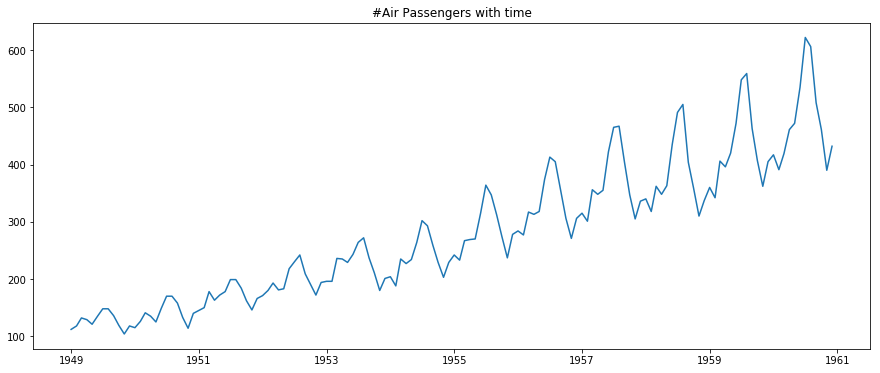

In [8]:
plt.plot(air_passengers)
plt.title('#Air Passengers with time')
plt.savefig('plots/ts_airpassenger_1.jpg')


# the plot clearly shows increase in variance of #passengers 
# with time, so lets take the log of the data to 
# penalize the higher magnitude values.

In [9]:
log_air_passengers = np.log(air_passengers)

In [10]:
log_air_passengers.head()

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


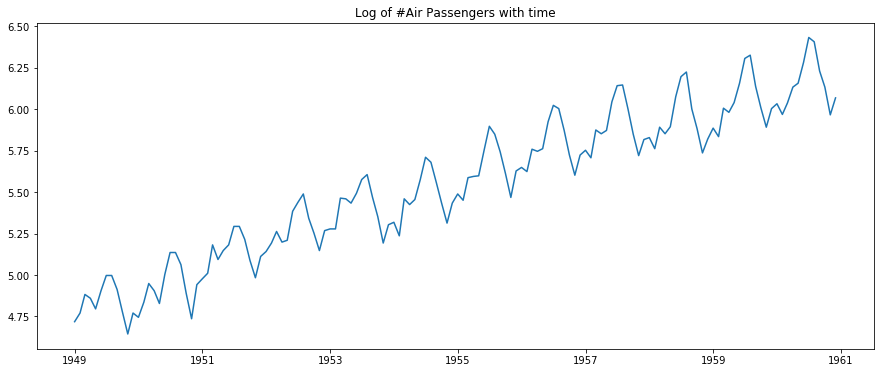

In [11]:
plt.plot(log_air_passengers)
plt.title('Log of #Air Passengers with time')
plt.savefig('plots/ts_airpassenger_2.jpg')

# we can now clearly see there is a upward trend
# and some seasonality effect

In [12]:
# lets difference the data with lag-1 so check for stationarity
log_air_passengers_diff = log_air_passengers - log_air_passengers.shift()

In [13]:
# the first value will be NaN as we have shifted the data.
log_air_passengers_diff.head()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022


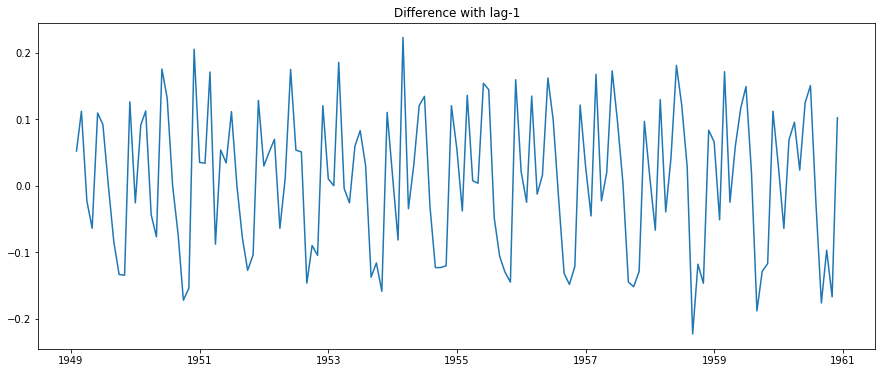

In [14]:
# now lets see if the data is stationary or not.
plt.plot(log_air_passengers_diff)
plt.title('Difference with lag-1')
plt.savefig('plots/ts_airpassenger_3.jpg')

In [15]:
# drop the NaN value
log_air_passengers_diff.dropna(inplace=True)

In [16]:
log_air_passengers_diff.head()

,Passengers
Month,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484


In [17]:
log_air_passengers_diff.tail()

,Passengers
Month,
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083
1960-11-01,-0.167251
1960-12-01,0.102279


## Check stationarity of the data using Dickey-Fuller test

In [21]:
from pandas.core import datetools
from statsmodels.tsa.stattools import adfuller

In [22]:
# adfuller method works for 1d data so, the data should 
# either be a series or a 1d numpy array

# write a funtion to check the stationarity of the data.
def check_data_stationarity(data):
    
    fuller_results = adfuller(data['Passengers'])

    print('Fuller Statistics {}:'.format(fuller_results[0]))
    print('Fuller test P-value {}:'.format(fuller_results[1]))

    for key, value in fuller_results[4].items():
        print('Significance Level and value: {0} : {1}:'.format(key, value))
        
    return

In [23]:
# check log data for stationarity
check_data_stationarity(log_air_passengers)

# the p-value is greater than critical value so
# we cannot reject the null hypothesis

# H0 - the series is not stationary
# H1 - the series is stationary

Fuller Statistics -1.7170170891069605:
Fuller test P-value 0.42236677477039125:
Significance Level and value: 1% : -3.4816817173418295:
Significance Level and value: 5% : -2.8840418343195267:
Significance Level and value: 10% : -2.578770059171598:


In [25]:
# check log differenced data for stationarity

# the p-value is greater than critical value so
# we cannot reject the null hypothesis

# H0 - the series is not stationary
# H1 - the series is stationary

check_data_stationarity(log_air_passengers_diff)

Fuller Statistics -2.7171305983881284:
Fuller test P-value 0.0711205481508595:
Significance Level and value: 1% : -3.4825006939887997:
Significance Level and value: 5% : -2.884397984161377:
Significance Level and value: 10% : -2.578960197753906:


In [26]:
from statsmodels.tsa.stattools import acf, pacf

In [29]:
# lets look at the acf and pacf plots of log data
lag_acf = acf(log_air_passengers.values, nlags = 30)
lag_pacf = pacf(log_air_passengers.values, nlags = 30)

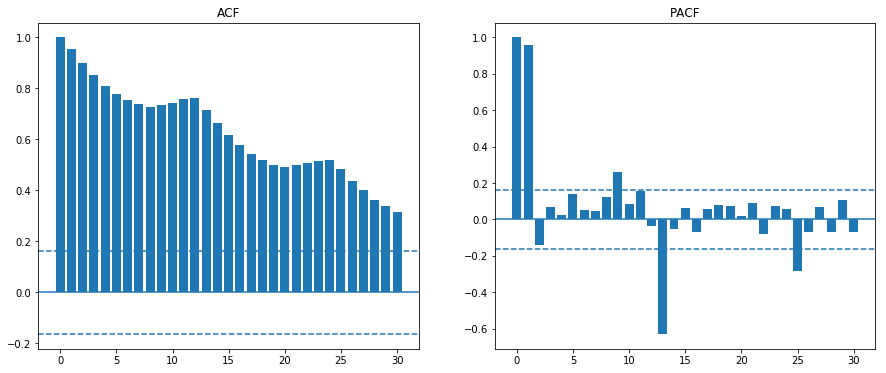

In [30]:
## for log transformed data..

# Auto-Correlation Function to check MA process 
plt.subplot(121) 
plt.bar(range(len(lag_acf)), height = lag_acf)
plt.axhline(y=0, linestyle='-')
plt.title('ACF')
plt.axhline(y=-1.96/np.sqrt(len(log_air_passengers)), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_air_passengers)), linestyle='--')

# look at where the plot crosses the upper confidence interval for the first time
# for ACF this is 1 and gives us the p value

# Partial Auto-Correlation Function to check AR process
plt.subplot(122) 
plt.bar(range(len(lag_pacf)), height = lag_pacf)
plt.axhline(y=0, linestyle='-')
plt.title('PACF')
plt.axhline(y=-1.96/np.sqrt(len(log_air_passengers)), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_air_passengers)), linestyle='--')

plt.savefig('plots/ts_airpassenger_3.jpg')
# look at where the plot crosses the upper confidence interval for the first time
# for PACF this is 2 and gives us the p value

In [31]:
# acf plot:
    # 1. definately some seasonality (yearly) for ma(q) process
    # 2. check the difference data
# pacf plot:
    # 1. lag 1 and lag 12 are significant, so, ar(1) process and sar(1)
    # 2. lag is significant for lag 8 or 9
    # 3. check the difference data

In [32]:
# log transformed data
d_lag_acf = acf(log_air_passengers_diff.values, nlags = 30)
d_lag_pacf = pacf(log_air_passengers_diff.values, nlags = 30)

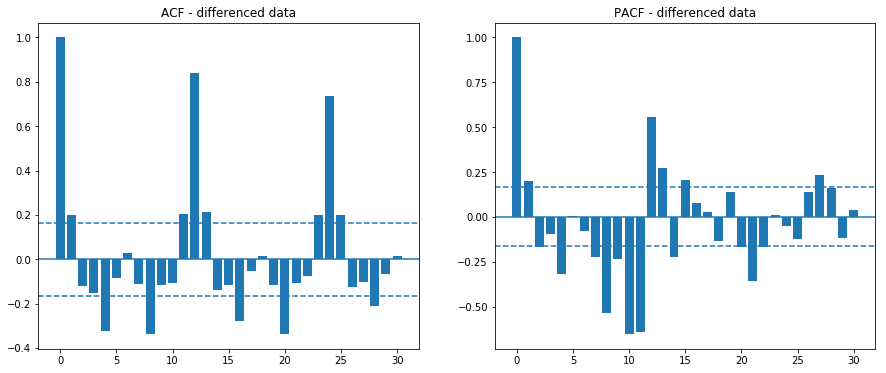

In [33]:
## for differenced log data..

# Auto-Correlation Function to check MA process 
plt.subplot(121) 
plt.bar(range(len(d_lag_acf)), height = d_lag_acf)
plt.axhline(y=0, linestyle='-')
plt.title('ACF - differenced data')
plt.axhline(y=-1.96/np.sqrt(len(log_air_passengers_diff)), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_air_passengers_diff)), linestyle='--')

# Partial Auto-Correlation Function to check AR process
plt.subplot(122) 
plt.bar(range(len(d_lag_acf)), height = d_lag_pacf)
plt.axhline(y=0, linestyle='-')
plt.title('PACF - differenced data')
plt.axhline(y=-1.96/np.sqrt(len(log_air_passengers_diff)), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_air_passengers_diff)), linestyle='--')

plt.savefig('plots/ts_airpassenger_4.jpg')

In [34]:
# acf plot:
    # 1. yearly and might be quaterly seasonality for ma(q) process
# pacf plot:
    # 1. lag 1 and lag 12 are significant, so, ar(1) process and sar(1)
    # 2. lag is significant for lag 8 or 9

## forecasting

In [64]:
from statsmodels.tsa.arima_model import ARIMA

/Users/manish/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/manish/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/manish/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: ')

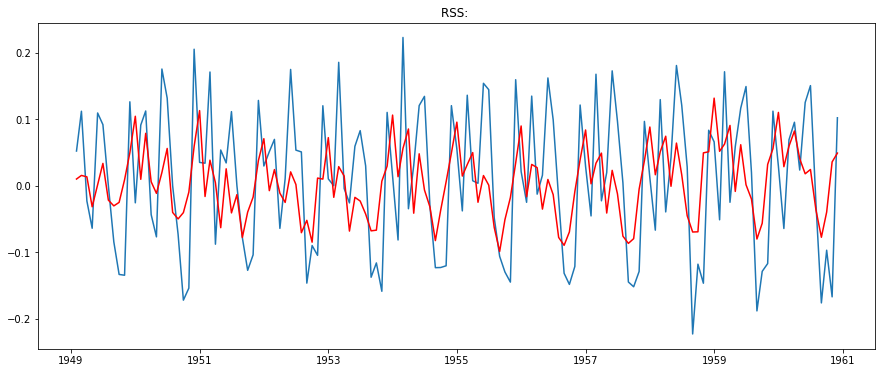

In [85]:
## AR model

# the parameter order has 3 components :
# 1. The number of Auto-Regressive Terms (p)
# 2. The number of differences taken (d)
# 3. The number of Moving Average Terms (q)

model = ARIMA(log_air_passengers, order=(1, 1, 2))  
results_MA2 = model.fit(disp=-1)  

plt.plot(log_air_passengers_diff)
plt.plot(results_MA2.fittedvalues, color='red')
rss_value = sum((results_MA2.fittedvalues - log_air_passengers_diff['Passengers'])**2)
plt.title('RSS: '.format(rss_value))

/Users/manish/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/manish/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/manish/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


ValueError: Cannot add integral value to Timestamp without freq.

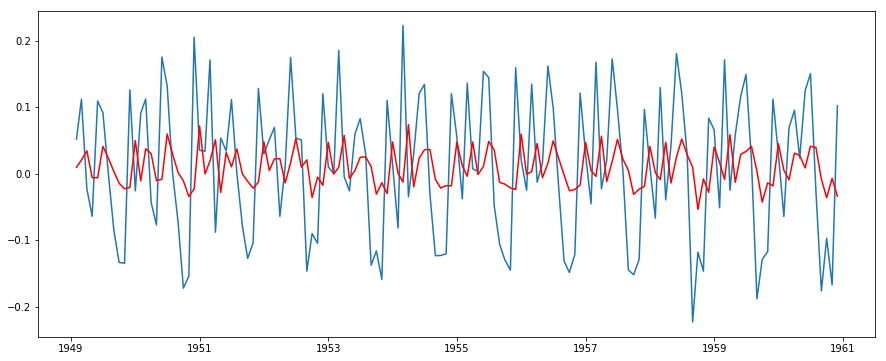

In [56]:
## MA model

model = ARIMA(log_air_passengers, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(log_air_passengers_diff)
plt.plot(results_MA.fittedvalues, color='red')
rss_value = sum((results_MA2.fittedvalues - log_air_passengers['Passengers'])**2)
plt.title('RSS: %.4f: '.format(rss_value))

/Users/manish/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/manish/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/manish/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


ValueError: Cannot add integral value to Timestamp without freq.

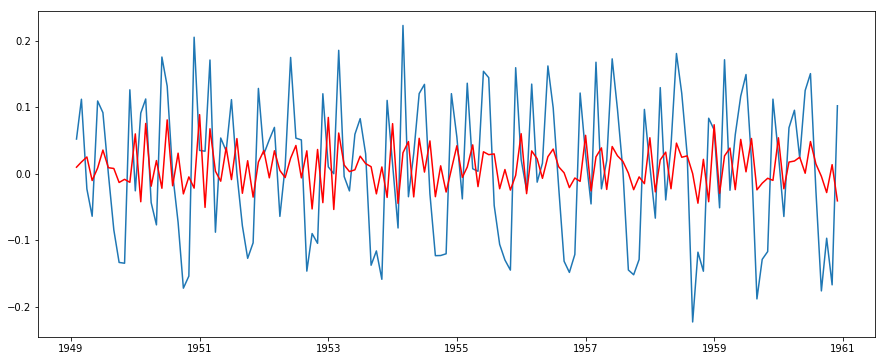

In [57]:
# ARIMA model
# try p = 1 or 2

model = ARIMA(log_air_passengers, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(log_air_passengers_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-log_air_passengers_diff)**2))

In [65]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009800
1949-03-01    0.017618
1949-04-01    0.025229
1949-05-01   -0.010225
1949-06-01    0.008528
dtype: float64


In [66]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009800
1949-03-01    0.027418
1949-04-01    0.052648
1949-05-01    0.042422
1949-06-01    0.050950
dtype: float64


In [67]:
# just getting the index
predictions_ARIMA_log = pd.Series(log_air_passengers.iloc[0], index=log_air_passengers.index)
predictions_ARIMA_log.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: 1949-01-01 00:00:00, dtype: float64

In [68]:
predictions_ARIMA_log = pd.Series(log_air_passengers.ix[0], index=log_air_passengers.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01         NaN
1949-02-01    0.009800
1949-03-01    0.027418
1949-04-01    0.052648
1949-05-01    0.042422
dtype: float64

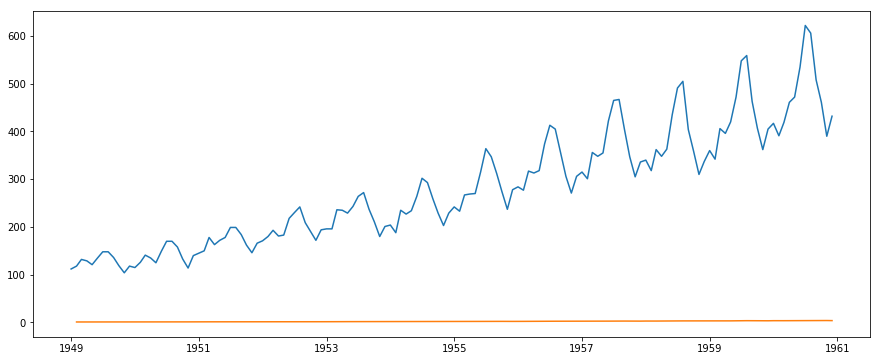

In [69]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(air_passengers)
plt.plot(predictions_ARIMA)